In [12]:
import math
import tifffile
import os
import math
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt
from stardist.models import StarDist2D

Using TensorFlow backend.


# Load Models

In [13]:
# prints a list of available models 
StarDist2D.from_pretrained() 
# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


# Individual slides

In [14]:
INPUT_PATH = "D://2023-02-08_S139_geomx//images"
image_name ="Pre.ome.tif"
IMAGE_PATH = os.path.join(INPUT_PATH, image_name)
img = tifffile.imread(IMAGE_PATH,key=3)
img.shape
img = img[0] # select the channel you want to use
img.shape

Text(0.5, 1.0, 'input image')

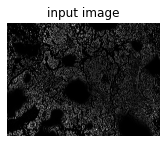

In [31]:
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("input image")

In [7]:
#4781712.046875 is the pp2 per tile constant, recommended number of tiles
import math
tiles = int(math.sqrt(int(img.shape[0]*img.shape[1]/(4781712.046875))))
tiles

22

In [16]:
# Add x,y number of tiles
x=35
y=35
labels, _ = model.predict_instances(normalize(img),n_tiles=(x,y))

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img))
plt.axis("off")
plt.title("prediction + input overlay")

In [35]:
#float_64
labels=labels.astype("int32")
labels.dtype

dtype('int32')

In [19]:
OUTPUT_PATH = "D:"
output_name= OUTPUT_PATH + "//S0139_Pre" + "_labels" + ".ome.tiff"
tifffile.imsave(output_name,labels)

# Multiple slides

In [ ]:
#Output path should be an empty folder
#Input path must only have the images to segment
INPUT_PATH = "/home/ad/dept/ltdk_farkkila/Projects/Spleen_slides/Slide3_33-Slide4_33/images4"
OUTPUT_PATH = "/output_folder/"
x=8 #x number of tiles
y=8 #y number of tiles

arr = os.listdir(INPUT_PATH)
print(arr)
#verify you only have the desired images here

In [ ]:
import os

for image in arr:
    image_name =image
    sep = '.'
    imageid = image_name.split(sep, 1)[0]
    print(imageid)
    IMAGE_PATH = os.path.join(INPUT_PATH, image_name)
    print("reading image")
    
    img = tifffile.imread(IMAGE_PATH)
    img = img[0]
    img.shape
    labels, _ = model.predict_instances(normalize(img),n_tiles=(x,y))
    labels=labels.astype("int32")
    
    output_name= OUTPUT_PATH + imageid + "_labels" + ".ome.tiff"
    tifffile.imsave(output_name,labels)

# Trouble shooting

In [ ]:
from skimage.io import imread
import napari

img = tifffile.imread("S120_iOme_trial_labels.ome.tiff")

In [ ]:
if 'viewer' not in globals():
    viewer = napari.Viewer()